In [20]:
from utils import get_df, data_lines
import pandas as pd
import tomotopy as tp
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pre_processing as pp
import argument_clustering.argument_clustering as ac

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/ivana/Documents/TUM/Study/SS_21_22/NLP_Praktikum/argument-clustering/topic_clustering/topic_clustering.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  def most_common_value(column: pd.Series(), n: int):
/Users/ivana/Documents/TUM/Study/SS_21_22/NLP_Praktikum/argument-clustering/topic_clustering/topic_clustering.py:58: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  def most_significant_value(column: pd.Series(), counts: pd.Series()):
/Users/ivana/Documents/TUM/Study/SS_21_22/NLP_Praktikum/argument-clustering/topic_clustering/topic_clustering.py:58: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  def most_significant_value(column: pd.

### Load data into dataframe

In [2]:
df = get_df()

### Preprocess lines for topic modelling

In [3]:
tokenizer = pp.TokTok_Tokenizer()

stopwords = pp.stopwords()

translator = pp.translator()

#nltk.download('wordnet')
lemmatizer = pp.lemmatizer()

stemmer = pp.stemmer()

df = df.replace({"Name": pp.corrected_names_dict()})

In [4]:
df["Tokenized"] = df["Sentence"].map(lambda x: tokenizer.tokenize(x))
df["Cleaned"] = df["Tokenized"].map(lambda x: pp.clean_tokens(x,translator,stopwords))
#df["Stemmed"] = df["Cleaned"].map(lambda x: pp.stem(x, stemmer))
df["Lemmatized"] = df["Cleaned"].map(lambda x: pp.lemmatize(x, lemmatizer))
df["PoS Tagged"] = df["Lemmatized"].map(lambda x: pp.pos_tag(x))
df["Nouns only"] = df["PoS Tagged"].map(lambda x: pp.get_pos_tagged_words(x, ['NN']))
df["Nouns and Verbs"] = df["PoS Tagged"].map(lambda x: pp.get_pos_tagged_words(x, ['NN', 'VB']))
df["Nouns, Adjectives and Verbs"] = df["PoS Tagged"].map(lambda x: pp.get_pos_tagged_words(x, ['NN', 'JJ', 'VB']))
df["Nouns, Adjectives, Adverbs and Verbs"] = df["PoS Tagged"].map(lambda x: pp.get_pos_tagged_words(x, ['NN', 'JJ', 'RB', 'VB']))

In [6]:
df

,Release Date,Season,Episode,Episode Title,Name,Sentence,Tokenized,Cleaned,Lemmatized,PoS Tagged,Nouns only,Nouns and Verbs,"Nouns, Adjectives and Verbs","Nouns, Adjectives, Adverbs and Verbs"
0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...,"[What, do, you, expect, ?, They, ', re, savage...","[lot, another, know, one, pieces, ripping, exp...","[lot, another, know, one, piece, ripping, expe...","[(lot, NN), (another, DT), (know, VBP), (one, ...","[lot, piece, steal, goat, savage]","[lot, piece, steal, goat, savage]","[lot, piece, expect, steal, goat, savage]","[lot, piece, expect, steal, goat, savage]"
1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...,"[I, ', ve, never, seen, wildlings, do, a, thin...","[ever, wildlings, life, like, seen, never, thing]","[ever, wildlings, life, like, seen, never, thing]","[(ever, RB), (wildlings, VBZ), (life, NN), (li...","[life, thing]","[life, thing]","[life, thing]","[ever, life, never, thing]"
2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?,"[How, close, did, you, get, ?]","[get, close]","[get, close]","[(get, VB), (close, JJ)]",[],[get],"[get, close]","[get, close]"
3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.,"[Close, as, any, man, would, .]","[would, close, man]","[would, close, man]","[(would, MD), (close, VB), (man, NN)]",[man],"[close, man]","[close, man]","[close, man]"
4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.,"[We, should, head, back, to, the, wall, .]","[back, head, wall]","[back, head, wall]","[(back, RB), (head, NN), (wall, NN)]","[head, wall]","[head, wall]","[head, wall]","[back, head, wall]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23906,2019-05-19,Season 8,Episode 6,The Iron Throne,brienne,I think we can all agree that ships take prece...,"[I, think, we, can, all, agree, that, ships, t...","[brothels, agree, ships, take, think, precedence]","[brothel, agree, ship, take, think, precedence]","[(brothel, NN), (agree, JJ), (ship, NN), (take...","[brothel, ship, think, precedence]","[brothel, ship, take, think, precedence]","[brothel, agree, ship, take, think, precedence]","[brothel, agree, ship, take, think, precedence]"
23907,2019-05-19,Season 8,Episode 6,The Iron Throne,bronn,I think that's a very presumptuous statement.,"[I, think, that, ', s, a, very, presumptuous, ...","[presumptuous, think, statement]","[presumptuous, think, statement]","[(presumptuous, JJ), (think, VBP), (statement,...",[statement],[statement],"[presumptuous, statement]","[presumptuous, statement]"
23908,2019-05-19,Season 8,Episode 6,The Iron Throne,tyrion lannister,I once brought a jackass and a honeycomb into ...,"[I, once, brought, a, jackass, and, a, honeyco...","[brought, brothel, honeycomb, jackass]","[brought, brothel, honeycomb, jackass]","[(brought, VBN), (brothel, NN), (honeycomb, NN...","[brothel, honeycomb, jackass]","[brothel, honeycomb, jackass]","[brothel, honeycomb, jackass]","[brothel, honeycomb, jackass]"
23909,2019-05-19,Season 8,Episode 6,The Iron Throne,man,The Queen in the North!,"[The, Queen, in, the, North, !]","[north, queen]","[north, queen]","[(north, RB), (queen, JJ)]",[],[],[queen],"[north, queen]"


### Extras for understanding the preprocessing

In [7]:
df.loc[df["Name"] == "alliser"]

,Release Date,Season,Episode,Episode Title,Name,Sentence,Tokenized,Cleaned,Lemmatized,PoS Tagged,Nouns only,Nouns and Verbs,"Nouns, Adjectives and Verbs","Nouns, Adjectives, Adverbs and Verbs"


In [8]:
df.loc[df["Name"] == "alliser thorn"]

,Release Date,Season,Episode,Episode Title,Name,Sentence,Tokenized,Cleaned,Lemmatized,PoS Tagged,Nouns only,Nouns and Verbs,"Nouns, Adjectives and Verbs","Nouns, Adjectives, Adverbs and Verbs"
767,2011-05-01,Season 1,Episode 3,Lord Snow,alliser thorn,"If that were a real sword, you'd be dead. Lord...","[If, that, were, a, real, sword, ,, you, ', d,...","[bleeds, dead, lord, grew, likes, sword, pyp, ...","[bleeds, dead, lord, grew, like, sword, pyp, n...","[(bleeds, NNS), (dead, JJ), (lord, NN), (grew,...","[lord, sword, pyp, bastard, rest, spitting, ca...","[lord, sword, pyp, bastard, rest, spitting, ca...","[dead, lord, sword, pyp, stark, bastard, real,...","[dead, lord, sword, pyp, stark, bastard, real,..."
768,2011-05-01,Season 1,Episode 3,Lord Snow,alliser thorn,Next!,"[Next, !]",[next],[next],"[(next, JJ)]",[],[],[next],[next]
769,2011-05-01,Season 1,Episode 3,Lord Snow,alliser thorn,"Lord Snow, it appears you're the least useless...","[Lord, Snow, ,, it, appears, you, ', re, the, ...","[lord, useless, appears, person, day, much, go...","[lord, useless, appears, person, day, much, go...","[(lord, NN), (useless, NN), (appears, VBZ), (p...","[lord, useless, person, day, stomach, clean]","[lord, useless, person, day, go, stomach, clean]","[lord, useless, person, day, much, go, snow, s...","[lord, useless, person, day, much, go, snow, s..."
1009,2011-05-08,Season 1,Episode 4,"Cripples, Bastards and Broken Things",alliser thorn,Tell them your name.,"[Tell, them, your, name, .]","[tell, name]","[tell, name]","[(tell, NN), (name, NN)]","[tell, name]","[tell, name]","[tell, name]","[tell, name]"
1012,2011-05-08,Season 1,Episode 4,"Cripples, Bastards and Broken Things",alliser thorn,"Well, you couldn't be any worse than you look....","[Well, ,, you, couldn, ', t, be, any, worse, t...","[well, look, worse, see]","[well, look, worse, see]","[(well, RB), (look, VB), (worse, JJR), (see, NN)]",[see],"[look, see]","[look, see]","[well, look, see]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17412,2016-05-01,Season 6,Episode 2,Home,alliser thorn,Come on,"[Come, on]",[come],[come],"[(come, VB)]",[],[come],[come],[come]
17413,2016-05-01,Season 6,Episode 2,Home,alliser thorn,Attack!,"[Attack, !]",[attack],[attack],"[(attack, NN)]",[attack],[attack],[attack],[attack]
17414,2016-05-01,Season 6,Episode 2,Home,alliser thorn,"Fight, you cowards!","[Fight, ,, you, cowards, !]","[cowards, fight]","[coward, fight]","[(coward, NN), (fight, NN)]","[coward, fight]","[coward, fight]","[coward, fight]","[coward, fight]"
17415,2016-05-01,Season 6,Episode 2,Home,alliser thorn,You fucking traitor,"[You, fucking, traitor]","[fucking, traitor]","[fucking, traitor]","[(fucking, VBG), (traitor, NN)]",[traitor],[traitor],[traitor],[traitor]


In [9]:
example_sentence = " queen in the north don't running ... gonna athastokhdeveshizar"

In [10]:
tokenizer = pp.TokTok_Tokenizer(example_sentence)
pp.Nltk_Tokenizer(example_sentence)
#tokenizer = pp.BERTTokenizer(example_sentence)

Example of tokenization:
['queen', 'in', 'the', 'north', 'don', "'", 't', 'running', '...', 'gonna', 'athastokhdeveshizar']
No initialization needed for nltk tokenizer. Usage: 'nltk.word_tokenize('String')' 
Example of tokenization:
['queen', 'in', 'the', 'north', 'do', "n't", 'running', '...', 'gon', 'na', 'athastokhdeveshizar']


In [11]:
print(df["Sentence"].map(lambda x: tokenizer.tokenize(x)))

0        [What, do, you, expect, ?, They, ', re, savage...
1        [I, ', ve, never, seen, wildlings, do, a, thin...
2                           [How, close, did, you, get, ?]
3                          [Close, as, any, man, would, .]
4               [We, should, head, back, to, the, wall, .]
                               ...                        
23906    [I, think, we, can, all, agree, that, ships, t...
23907    [I, think, that, ', s, a, very, presumptuous, ...
23908    [I, once, brought, a, jackass, and, a, honeyco...
23909                      [The, Queen, in, the, North, !]
23910    [The, Queen, in, the, North, !, The, Queen, in...
Name: Sentence, Length: 23911, dtype: object


In [12]:
stopwords = pp.stopwords(show=True)

Extracted meaningless 2-3 letters words from dataset: 
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no

In [13]:
pp.lemmatize(pp.clean_tokens(tokenizer.tokenize(example_sentence),translator,stopwords), lemmatizer)

['athastokhdeveshizar', 'queen', 'north', 'running', 'gonna']

In [14]:
pp.stem(pp.clean_tokens(tokenizer.tokenize(example_sentence),translator,stopwords), stemmer)

['athastokhdeveshizar', 'queen', 'north', 'run', 'gonna']

In [15]:
pp.extract_tokens_w_len_123(df["Lemmatized"])

['u']
['10', '11', '12', '13', '14', '15', '16', '17', '19', '20', '25', '30', '32', '40', '50', '60', '62', '67', '70', '80', '90', 'as', 'ax', 'dy', 'go', 'jr', 'le', 'ln', 'ro', 'u', 'us', '“a']
['000', '100', '120', '143', '147', '162', '163', '200', '212', '300', '400', '500', '600', '700', 'act', 'add', 'age', 'ago', 'aid', 'ail', 'aim', 'air', 'ala', 'ale', 'ant', 'arm', 'art', 'ash', 'ask', 'ass', 'ate', 'awe', 'axe', 'aye', 'bad', 'bag', 'bar', 'bat', 'bay', 'bed', 'beg', 'bet', 'bid', 'big', 'bit', 'bow', 'box', 'boy', 'bra', 'bug', 'bum', 'buy', 'cat', 'cow', 'coy', 'cry', 'cub', 'cum', 'cup', 'cut', 'dad', 'day', 'die', 'dig', 'doe', 'dog', 'dom', 'dry', 'due', 'dug', 'ear', 'eas', 'eat', 'edd', 'eel', 'egg', 'elk', 'elm', 'end', 'eve', 'eye', 'far', 'fat', 'fed', 'fee', 'fig', 'fin', 'fit', 'fix', 'fly', 'foe', 'fox', 'fun', 'fur', 'gag', 'gap', 'gem', 'get', 'gin', 'god', 'got', 'gut', 'guy', 'hal', 'ham', 'hat', 'hay', 'hen', 'hey', 'hid', 'hip', 'hit', 'hog', 'hot', 'hu

In [16]:
# Part of speech tags are labels that indicate the kind/role of a token.
# Used to represent grammer, we can also have hierarchical tree representation
import nltk
print("POS examples:") #https://www.guru99.com/pos-tagging-chunking-nltk.html
for tag in ["NN", "VB", "PRP", ".", "NNP", "NNS", "VBZ", "MD", "'"]: # Noun, verb, preposition.. for english (may be different for other languages 
    nltk.help.upenn_tagset(tag)


POS examples:
NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...
PRP: pronoun, personal
    hers herself him himself hisself it itself me myself one oneself ours
    ourselves ownself self she thee theirs them themselves they thou thy us
.: sentence terminator
    . ! ?
NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...
NNS: noun, common, plural
    undergraduates scotches bric-a-brac products bodyguards facets coasts
    divestitures storehouses designs clubs fragrance

In [17]:
pp.get_pos_tagged_words(pp.stem(pp.clean_tokens(tokenizer.tokenize(example_sentence),translator,stopwords), stemmer))

No tags given using default tags: ['NN', 'VB']


[]

### Topic modelling

We will probably use more than just the __tomotopy__ library, but we should aim for interfaces to be as similar as possible, to easily swap between them in the pipeline.

In [ ]:
import models.topic_modeling_utils as tmu
import bertopic

model = bertopic.BERTopic.load("models/BERTopic_nouns_verbs_adj_adv_50.bin")
topics, probs = model.transform((df["Nouns, Adjectives, Adverbs and Verbs"].map(" ".join).tolist()))
tmu.prep_df(df, topics, probs)
df

In [18]:
# quick workaround if berttopic is not installed
# df = pd.read_csv('df_topics_reduced.csv')
# df

,Unnamed: 0,Release Date,Season,Episode,Episode Title,Name,Sentence,Tokenized,Cleaned,Lemmatized,PoS Tagged,Nouns only,Nouns and Verbs,"Nouns, Adjectives and Verbs","Nouns, Adjectives, Adverbs and Verbs",Topics,Probabilities
0,0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...,"['What', 'do', 'you', 'expect', '?', 'They', ""...","['another', 'expect', 'lot', 'know', 'pieces',...","['another', 'expect', 'lot', 'know', 'piece', ...","[('another', 'DT'), ('expect', 'VBP'), ('lot',...","['lot', 'piece', 'savage', 'goat']","['lot', 'piece', 'savage', 'goat']","['lot', 'piece', 'steal', 'savage', 'goat']","['lot', 'piece', 'steal', 'savage', 'goat']",-1,NaN
1,1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...,"['I', ""'"", 've', 'never', 'seen', 'wildlings',...","['ever', 'wildlings', 'thing', 'life', 'like',...","['ever', 'wildlings', 'thing', 'life', 'like',...","[('ever', 'RB'), ('wildlings', 'NNS'), ('thing...","['thing', 'life']","['thing', 'life']","['thing', 'life']","['ever', 'thing', 'life', 'never']",9,NaN
2,2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?,"['How', 'close', 'did', 'you', 'get', '?']","['close', 'get']","['close', 'get']","[('close', 'RB'), ('get', 'VB')]",[],['get'],['get'],"['close', 'get']",0,NaN
3,3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.,"['Close', 'as', 'any', 'man', 'would', '.']","['would', 'close', 'man']","['would', 'close', 'man']","[('would', 'MD'), ('close', 'VB'), ('man', 'NN')]",['man'],"['close', 'man']","['close', 'man']","['close', 'man']",0,NaN
4,4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.,"['We', 'should', 'head', 'back', 'to', 'the', ...","['back', 'wall', 'head']","['back', 'wall', 'head']","[('back', 'RB'), ('wall', 'NN'), ('head', 'NN')]","['wall', 'head']","['wall', 'head']","['wall', 'head']","['back', 'wall', 'head']",-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23906,23906,2019-05-19,Season 8,Episode 6,The Iron Throne,brienne,I think we can all agree that ships take prece...,"['I', 'think', 'we', 'can', 'all', 'agree', 't...","['take', 'ships', 'agree', 'think', 'precedenc...","['take', 'ship', 'agree', 'think', 'precedence...","[('take', 'VB'), ('ship', 'NN'), ('agree', 'JJ...","['ship', 'precedence', 'brothel']","['take', 'ship', 'precedence', 'brothel']","['take', 'ship', 'agree', 'precedence', 'broth...","['take', 'ship', 'agree', 'precedence', 'broth...",-1,NaN
23907,23907,2019-05-19,Season 8,Episode 6,The Iron Throne,bronn,I think that's a very presumptuous statement.,"['I', 'think', 'that', ""'"", 's', 'a', 'very', ...","['think', 'statement', 'presumptuous']","['think', 'statement', 'presumptuous']","[('think', 'VB'), ('statement', 'NN'), ('presu...",['statement'],"['think', 'statement']","['think', 'statement', 'presumptuous']","['think', 'statement', 'presumptuous']",-1,NaN
23908,23908,2019-05-19,Season 8,Episode 6,The Iron Throne,tyrion lannister,I once brought a jackass and a honeycomb into ...,"['I', 'once', 'brought', 'a', 'jackass', 'and'...","['honeycomb', 'brought', 'jackass', 'brothel']","['honeycomb', 'brought', 'jackass', 'brothel']","[('honeycomb', 'NN'), ('brought', 'VBD'), ('ja...","['honeycomb', 'jackass', 'brothel']","['honeycomb', 'jackass', 'brothel']","['honeycomb', 'jackass', 'brothel']","['honeycomb', 'jackass', 'brothel']",-1,NaN
23909,23909,2019-05-19,Season 8,Episode 6,The Iron Throne,man,The Queen in the North!,"['The', 'Queen', 'in', 'the', 'North', '!']","['queen', 'north']","['queen', 'north']","[('queen', 'JJ'), ('north', 'NN')]",['north'],['north'],"['queen', 'north']","['queen', 'north']",-1,NaN


### Compute embeddings

In [23]:
embeddings = ac.get_d2v_embeddings("doc2vec_N-adj-ad-v.model")

/Users/ivana/Documents/TUM/Study/SS_21_22/NLP_Praktikum/argument-clustering/argument_clustering/argument_clustering.py:78: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  def cosine_dist(embeddings: pd.Series()):
/Users/ivana/Documents/TUM/Study/SS_21_22/NLP_Praktikum/argument-clustering/argument_clustering/argument_clustering.py:111: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  def plot_arguments(embeddings: pd.Series(), topic=None, clusters=None, annotations=None, just_plot=False):


In [24]:
df["d2v"] = df.reset_index().apply(lambda x: embeddings[x["index"]], axis=1)

In [25]:
df

,Unnamed: 0,Release Date,Season,Episode,Episode Title,Name,Sentence,Tokenized,Cleaned,Lemmatized,PoS Tagged,Nouns only,Nouns and Verbs,"Nouns, Adjectives and Verbs","Nouns, Adjectives, Adverbs and Verbs",Topics,Probabilities,d2v
0,0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...,"['What', 'do', 'you', 'expect', '?', 'They', ""...","['another', 'expect', 'lot', 'know', 'pieces',...","['another', 'expect', 'lot', 'know', 'piece', ...","[('another', 'DT'), ('expect', 'VBP'), ('lot',...","['lot', 'piece', 'savage', 'goat']","['lot', 'piece', 'savage', 'goat']","['lot', 'piece', 'steal', 'savage', 'goat']","['lot', 'piece', 'steal', 'savage', 'goat']",-1,NaN,"[-0.009417218, 0.008911253, -0.008904802, -0.0..."
1,1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...,"['I', ""'"", 've', 'never', 'seen', 'wildlings',...","['ever', 'wildlings', 'thing', 'life', 'like',...","['ever', 'wildlings', 'thing', 'life', 'like',...","[('ever', 'RB'), ('wildlings', 'NNS'), ('thing...","['thing', 'life']","['thing', 'life']","['thing', 'life']","['ever', 'thing', 'life', 'never']",9,NaN,"[-0.00504403, -0.004537931, -0.0067787375, 0.0..."
2,2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?,"['How', 'close', 'did', 'you', 'get', '?']","['close', 'get']","['close', 'get']","[('close', 'RB'), ('get', 'VB')]",[],['get'],['get'],"['close', 'get']",0,NaN,"[-0.008572621, -0.0048666764, 0.0085863285, -0..."
3,3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.,"['Close', 'as', 'any', 'man', 'would', '.']","['would', 'close', 'man']","['would', 'close', 'man']","[('would', 'MD'), ('close', 'VB'), ('man', 'NN')]",['man'],"['close', 'man']","['close', 'man']","['close', 'man']",0,NaN,"[-0.0051081213, 0.010891327, 0.0024130228, 0.0..."
4,4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.,"['We', 'should', 'head', 'back', 'to', 'the', ...","['back', 'wall', 'head']","['back', 'wall', 'head']","[('back', 'RB'), ('wall', 'NN'), ('head', 'NN')]","['wall', 'head']","['wall', 'head']","['wall', 'head']","['back', 'wall', 'head']",-1,NaN,"[-0.007575488, -0.005646619, -0.005298539, -0...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23906,23906,2019-05-19,Season 8,Episode 6,The Iron Throne,brienne,I think we can all agree that ships take prece...,"['I', 'think', 'we', 'can', 'all', 'agree', 't...","['take', 'ships', 'agree', 'think', 'precedenc...","['take', 'ship', 'agree', 'think', 'precedence...","[('take', 'VB'), ('ship', 'NN'), ('agree', 'JJ...","['ship', 'precedence', 'brothel']","['take', 'ship', 'precedence', 'brothel']","['take', 'ship', 'agree', 'precedence', 'broth...","['take', 'ship', 'agree', 'precedence', 'broth...",-1,NaN,"[0.0030054387, 0.006969326, -0.006204321, -0.0..."
23907,23907,2019-05-19,Season 8,Episode 6,The Iron Throne,bronn,I think that's a very presumptuous statement.,"['I', 'think', 'that', ""'"", 's', 'a', 'very', ...","['think', 'statement', 'presumptuous']","['think', 'statement', 'presumptuous']","[('think', 'VB'), ('statement', 'NN'), ('presu...",['statement'],"['think', 'statement']","['think', 'statement', 'presumptuous']","['think', 'statement', 'presumptuous']",-1,NaN,"[-0.0134333, 0.028107246, -0.0026295711, -0.02..."
23908,23908,2019-05-19,Season 8,Episode 6,The Iron Throne,tyrion lannister,I once brought a jackass and a honeycomb into ...,"['I', 'once', 'brought', 'a', 'jackass', 'and'...","['honeycomb', 'brought', 'jackass', 'brothel']","['honeycomb', 'brought', 'jackass', 'brothel']","[('honeycomb', 'NN'), ('brought', 'VBD'), ('ja...","['honeycomb', 'jackass', 'brothel']","['honeycomb', 'jackass', 'brothel']","['honeycomb', 'jackass', 'brothel']","['honeycomb', 'jackass', 'brothel']",-1,NaN,"[0.00030725583, 0.014566539, 0.0055030626, -0...."
23909,23909,2019-05-19,Season 8,Episode 6,The

### Argument clustering

#### Visualize and cluster by characters for topic

In [26]:
characters = ['eddard stark', 'jon snow', 'cersei lannister', 'daenerys targaryen', 'tyrion lannister']

In [27]:
characaters_topic_1 = ac.get_embeddings_for(df, "Name", 1, characters, "d2v")
characaters_topic_1

,Name,d2v
0,cersei lannister,"[-0.005387707, 0.011206138, 0.002085228, -0.00..."
1,daenerys targaryen,"[-0.0036736445, 0.011088776, 0.0009243374, -0...."
2,eddard stark,"[-0.0057452414, 0.008899253, 0.0012331151, -0...."
3,jon snow,"[-0.0037570987, 0.0131804375, -0.0004752574, -..."
4,tyrion lannister,"[-0.006807058, 0.024716653, 0.0028127304, -0.0..."


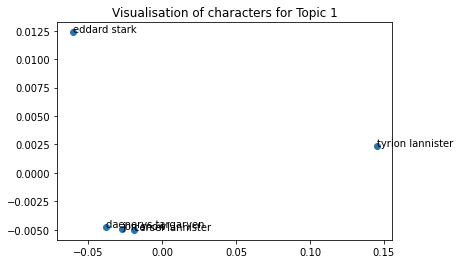

In [28]:
ac.plot_arguments(characaters_topic_1["d2v"], topic=1, annotations=characaters_topic_1["Name"])

In [29]:
dist = ac.cosine_dist(characaters_topic_1["d2v"])

In [30]:
linkage = ac.get_linkage(dist, "ward")

In [31]:
characaters_topic_1['cluster'] = ac.get_clusters_from_linkage(linkage, no_clusters=3)

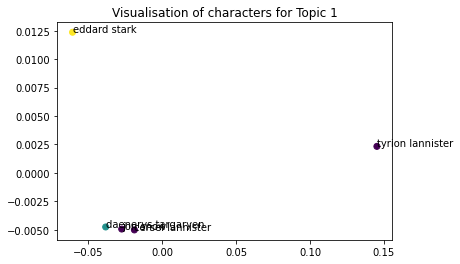

In [32]:
ac.plot_arguments(characaters_topic_1["d2v"], topic=1, annotations=characaters_topic_1["Name"], clusters=characaters_topic_1['cluster'])

#### Visualize by seasons for topic

In [33]:
seasons_topic_1 = ac.get_embeddings_for(df, topic=1, groupby="Season", embedding_column="d2v")
seasons_topic_1

,Season,d2v
0,Season 1,"[-0.0051148883, 0.017070372, 0.0012957555, -0...."
1,Season 2,"[-0.0040590446, 0.013873774, 0.0011571469, -0...."
2,Season 3,"[-0.0033468995, 0.011659128, 0.0016143381, -0...."
3,Season 4,"[-0.005741888, 0.016498363, 0.0009236653, -0.0..."
4,Season 5,"[-0.0048671183, 0.01697238, 0.0010077665, -0.0..."
5,Season 6,"[-0.0025403358, 0.011286981, -0.0005387403, -0..."
6,Season 7,"[-0.0039085858, 0.014364745, 0.00057778566, -0..."
7,Season 8,"[-0.0027619775, 0.010084921, 0.0012875592, -0...."


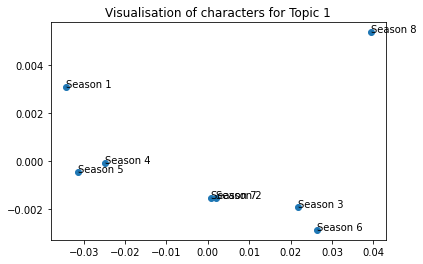

In [34]:
ac.plot_arguments(seasons_topic_1["d2v"], topic=1, annotations=seasons_topic_1["Season"])

In [35]:
dist = ac.cosine_dist(seasons_topic_1["d2v"])

In [36]:
linkage = ac.get_linkage(dist, "ward")

In [37]:
seasons_topic_1['cluster'] = ac.get_clusters_from_linkage(linkage, no_clusters=5)

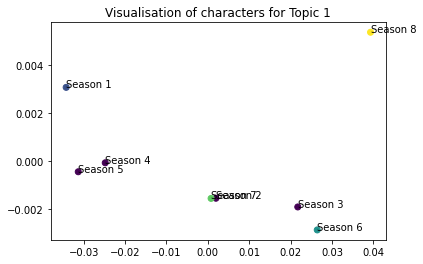

In [38]:
ac.plot_arguments(seasons_topic_1["d2v"], topic=1, annotations=seasons_topic_1["Season"], clusters=seasons_topic_1['cluster'])

## Results

### Topic 3: Lord Baelish

In [39]:
characters = ["catelyn stark", "sansa stark", "lysa arryn", "varys", "cersei lannister"]
topic = 3

               Name                                                d2v
0     catelyn stark  [0.0026202828, 0.013007298, -0.008250819, -0.0...
1  cersei lannister  [-0.0022911439, 0.006401095, 0.0005464767, -0....
2       sansa stark  [-0.0021216227, 0.0061917156, 0.0011570661, -0...
3             varys  [-0.006096446, 0.008756259, 0.0027393133, -0.0...


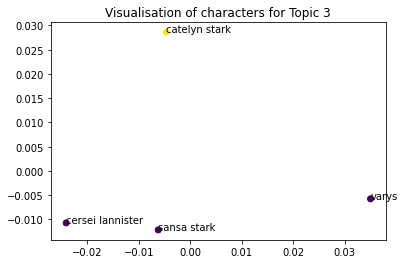

   cluster                                Name
0        1  cersei lannister,sansa stark,varys
1        2                       catelyn stark


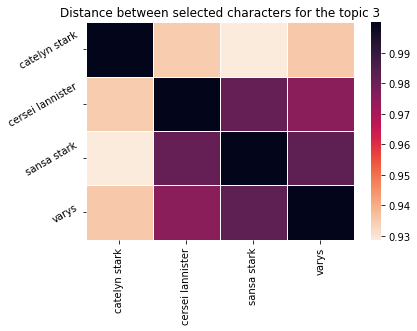

('sansa stark', 'varys', 0.017278433) are most similar characters in the topic 3.
('catelyn stark', 'sansa stark', 0.07122916) are least similar characters in the topic 3.


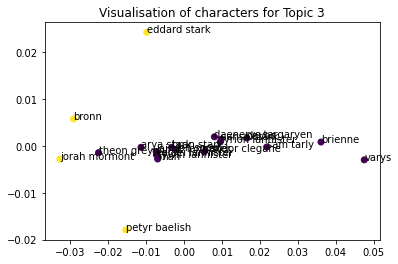

   cluster                                               Name
0        1  arya stark,bran stark,brienne,cersei lannister...
1        2     bronn,eddard stark,jorah mormont,petyr baelish


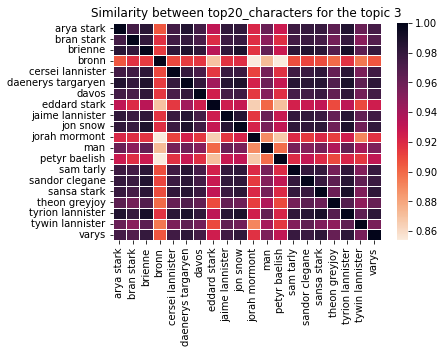

('brienne', 'tyrion lannister', 0.009668887) are most similar top20_characters in the topic 3.
('bronn', 'jorah mormont', 0.14627343) are least similar top20_characters in the topic 3.


In [40]:
ac.topic_argument_analysis(df, topic, characters)

Lysa Arryn is not present in this topic at all.

### Topic 5: Winterfell

In [41]:
characters = ["eddard stark", "sansa stark", "bran stark", "ramsay bolton", "stannis baratheon"]
topic = 5

                Name                                                d2v
0         bran stark  [-0.0004113133, 0.0049213753, 0.001696839, -0....
1       eddard stark  [-0.002866009, 0.006846981, 0.00072092825, -0....
2      ramsay bolton  [-0.0052134832, 0.015654098, 0.0016649092, -0....
3        sansa stark  [-0.0017970871, 0.0118531855, 0.00050213566, -...
4  stannis baratheon  [-0.0010897861, 0.0061499397, 0.003219142, -0....


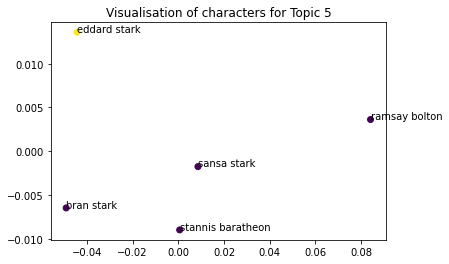

   cluster                                               Name
0        1  bran stark,ramsay bolton,sansa stark,stannis b...
1        2                                       eddard stark


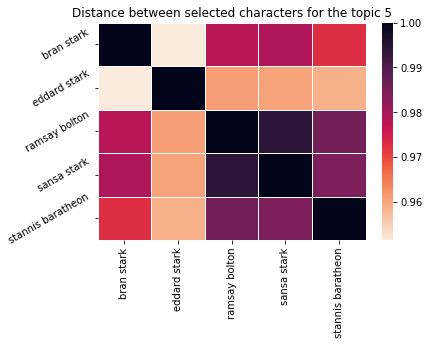

('ramsay bolton', 'sansa stark', 0.005652666) are most similar characters in the topic 5.
('bran stark', 'eddard stark', 0.048608303) are least similar characters in the topic 5.


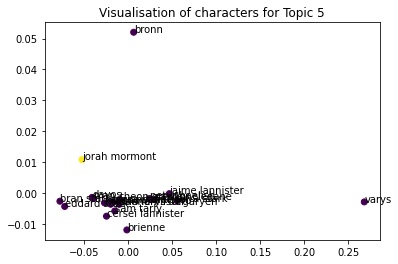

   cluster                                               Name
0        1  arya stark,bran stark,brienne,bronn,cersei lan...
1        2                                      jorah mormont


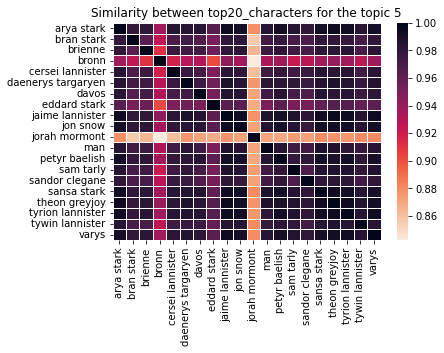

('jaime lannister', 'theon greyjoy', 0.0046224594) are most similar top20_characters in the topic 5.
('bronn', 'jorah mormont', 0.15784961) are least similar top20_characters in the topic 5.


In [42]:
ac.topic_argument_analysis(df, topic, characters)

### Topic 7: Starks

In [43]:
characters = ["jon snow", "jaime lannister", "cersei lannister",  "stannis baratheon"]
topic = 7

                Name                                                d2v
0   cersei lannister  [-0.003736216, 0.0077455826, 0.0011703571, -0....
1    jaime lannister  [-0.002495566, 0.0067164465, 0.00041701383, -0...
2           jon snow  [-0.0040564225, 0.0051692748, -0.000111552756,...
3  stannis baratheon  [-0.0054863286, 0.010499379, 0.00079480855, -0...


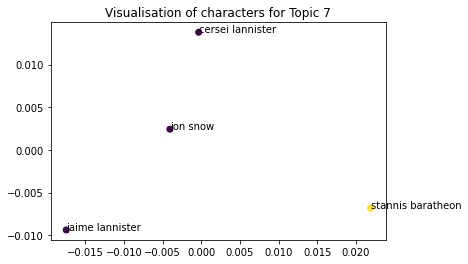

   cluster                                       Name
0        1  cersei lannister,jaime lannister,jon snow
1        2                          stannis baratheon


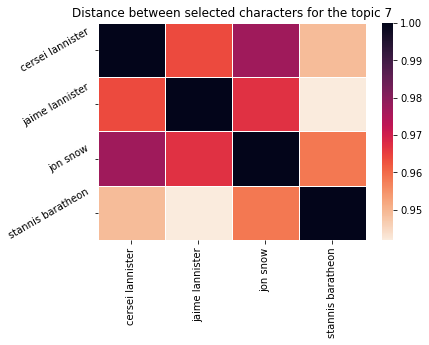

('cersei lannister', 'jon snow', 0.023091674) are most similar characters in the topic 7.
('jaime lannister', 'stannis baratheon', 0.05809176) are least similar characters in the topic 7.


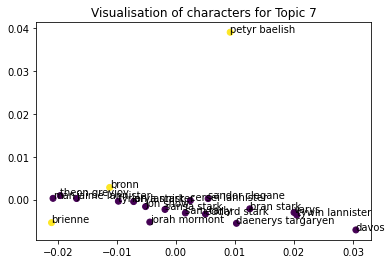

   cluster                                               Name
0        1  arya stark,bran stark,cersei lannister,daenery...
1        2                        brienne,bronn,petyr baelish


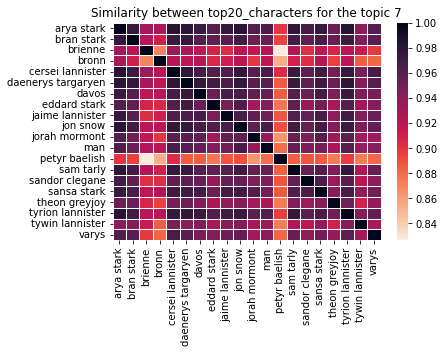

('arya stark', 'cersei lannister', 0.018368423) are most similar top20_characters in the topic 7.
('brienne', 'petyr baelish', 0.17349523) are least similar top20_characters in the topic 7.


In [44]:
ac.topic_argument_analysis(df, topic, characters)

### Topic 8: Daenerys' Advisors

In [45]:
characters = ["jon snow", "tyrion lannister", "davos", "varys", "daenerys targaryen"]
topic = 8

                 Name                                                d2v
0  daenerys targaryen  [-0.0024921065, 0.012417752, -0.001238039, -0....
1               davos  [-0.003959877, 0.015632788, 0.0011283528, -0.0...
2            jon snow  [-0.0016164673, 0.009261629, 0.0011967563, -0....
3    tyrion lannister  [-0.0026483769, 0.013829567, 0.0008578168, -0....
4               varys  [-0.006213923, 0.011278882, 0.0018236658, -0.0...


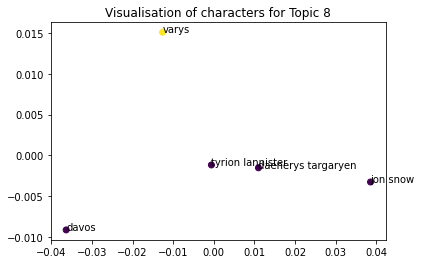

   cluster                                               Name
0        1  daenerys targaryen,davos,jon snow,tyrion lanni...
1        2                                              varys


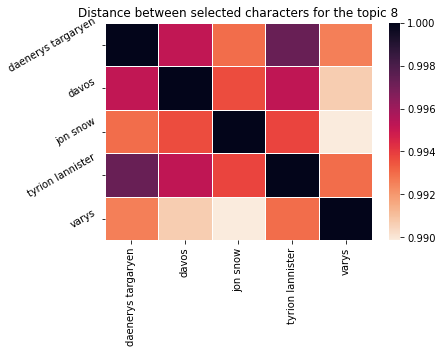

('daenerys targaryen', 'tyrion lannister', 0.0027291179) are most similar characters in the topic 8.
('jon snow', 'varys', 0.010145962) are least similar characters in the topic 8.


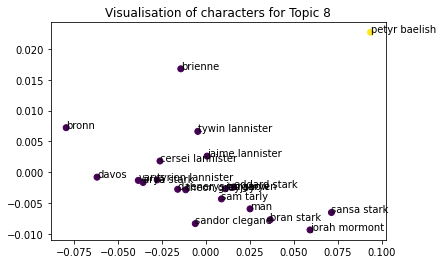

   cluster                                               Name
0        1  arya stark,bran stark,brienne,bronn,cersei lan...
1        2                                      petyr baelish


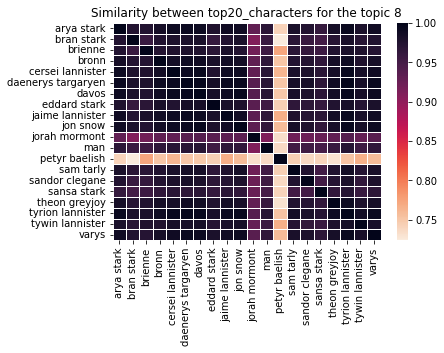

('daenerys targaryen', 'tyrion lannister', 0.0027291179) are most similar top20_characters in the topic 8.
('bran stark', 'petyr baelish', 0.2760765) are least similar top20_characters in the topic 8.


In [46]:
ac.topic_argument_analysis(df, topic, characters)

### Topic 9: Castlery Rock

In [47]:
characters = ["tywin lannister", "tyrion lannister", "cersei lannister", "daenerys targaryen"]
topic = 9

                 Name                                                d2v
0    cersei lannister  [-0.0014750838, 0.008046711, 0.0015716979, -0....
1  daenerys targaryen  [-0.0014917975, 0.0072727366, 0.0014523721, -0...
2    tyrion lannister  [0.00015615513, 0.0035134014, -0.0010121197, -...
3     tywin lannister  [-0.00077538635, 0.004066651, 0.0043736165, -0...


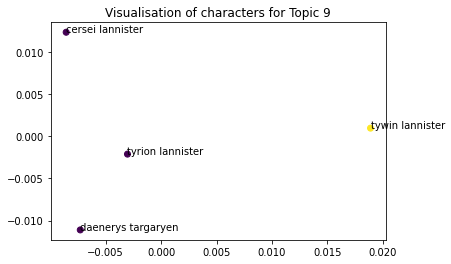

   cluster                                               Name
0        1  cersei lannister,daenerys targaryen,tyrion lan...
1        2                                    tywin lannister


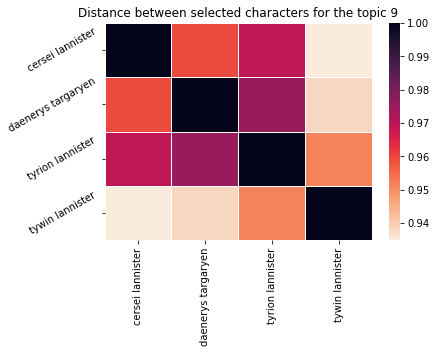

('daenerys targaryen', 'tyrion lannister', 0.024723768) are most similar characters in the topic 9.
('cersei lannister', 'tywin lannister', 0.065234125) are least similar characters in the topic 9.


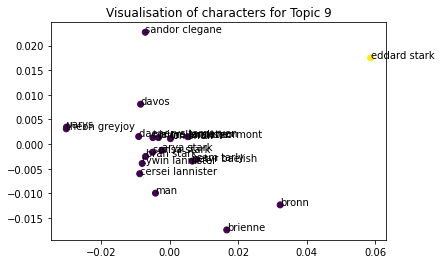

   cluster                                               Name
0        1  arya stark,bran stark,brienne,bronn,cersei lan...
1        2                                       eddard stark


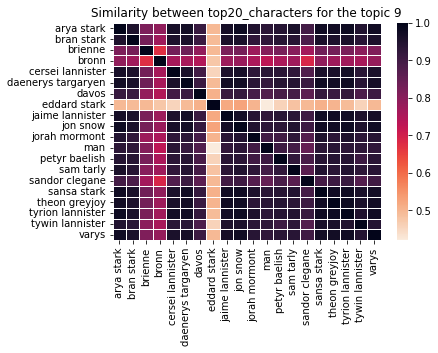

('arya stark', 'tyrion lannister', 0.0210284) are most similar top20_characters in the topic 9.
('eddard stark', 'man', 0.5801778) are least similar top20_characters in the topic 9.


In [48]:
ac.topic_argument_analysis(df, topic, characters)

### Overall across all topics

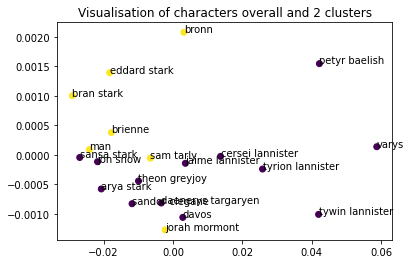

   cluster                                               Name
0        1  arya stark,cersei lannister,daenerys targaryen...
1        2  bran stark,brienne,bronn,eddard stark,jorah mo...


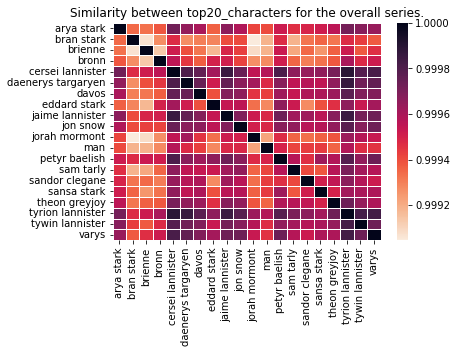

('cersei lannister', 'tyrion lannister', 0.000105023384) are most similar characters in overall.
('bran stark', 'jorah mormont', 0.0009543896) are least similar characters overall.


In [49]:
ac.overall_argument_analysis(df, embedding_column="d2v")